In [8]:
from numpy import exp
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as pltss
import cv2 as cv
from matplotlib import cm
import os

image originale converti en HSV


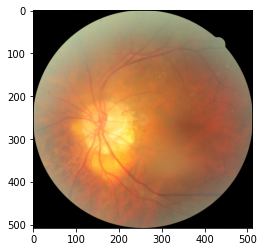

plan de couleur val


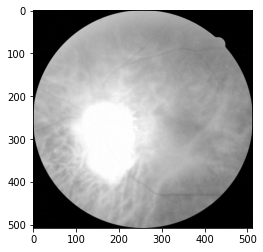

résultat prétraitement


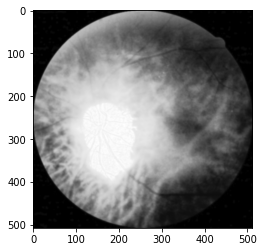

résultat Opennig


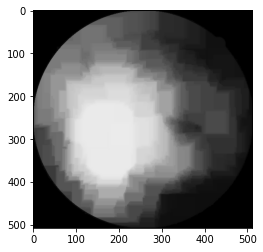

résultat closing


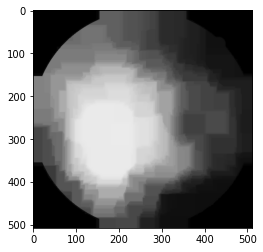

shape de closing= (508, 512)


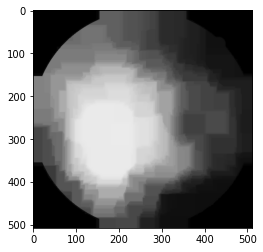

resultat de seuillage


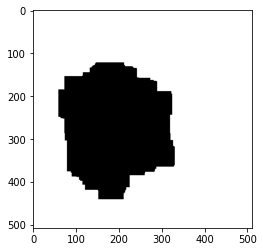

resultat final


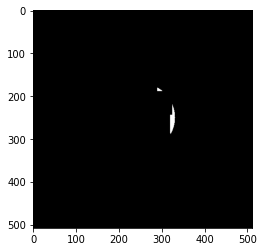

image originale converti en HSV


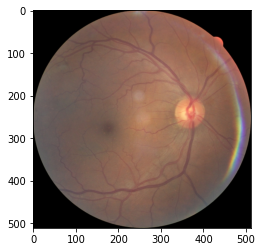

plan de couleur val


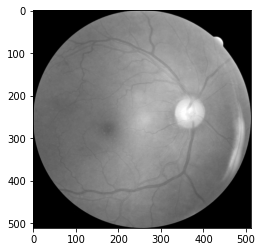

résultat prétraitement


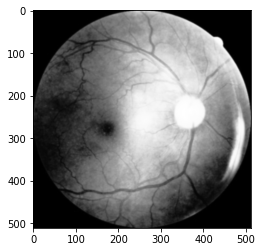

résultat Opennig


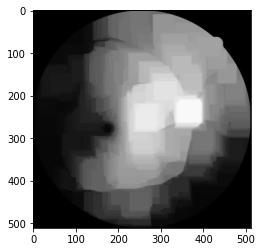

résultat closing


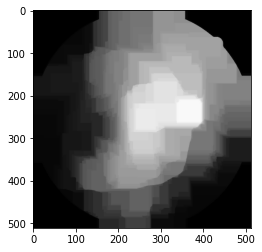

shape de closing= (511, 512)


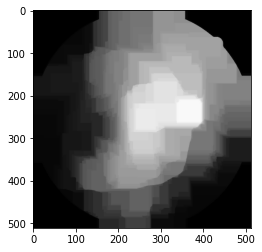

resultat de seuillage


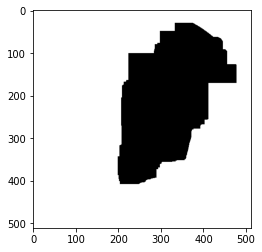

resultat final


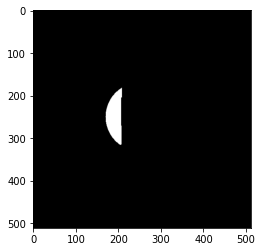

image originale converti en HSV


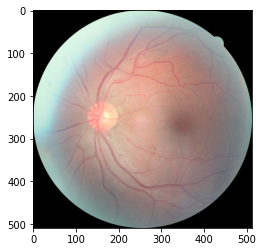

plan de couleur val


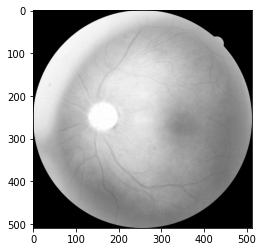

résultat prétraitement


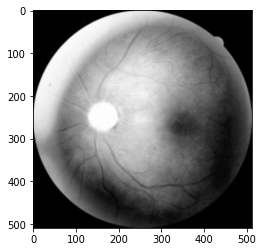

résultat Opennig


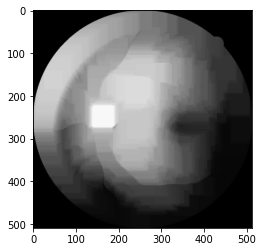

résultat closing


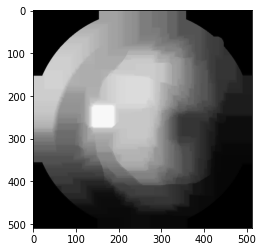

shape de closing= (509, 512)


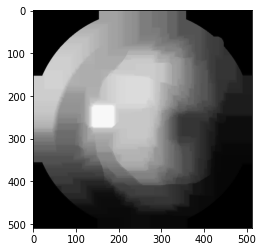

resultat de seuillage


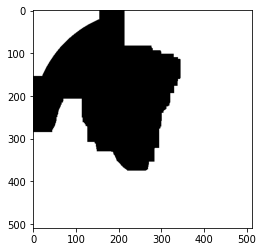

resultat final


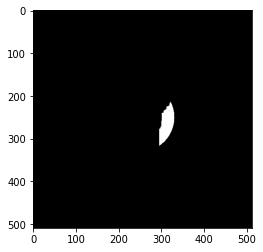

image originale converti en HSV


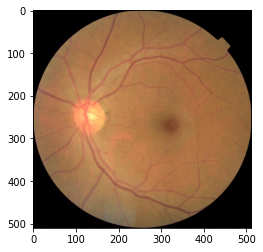

plan de couleur val


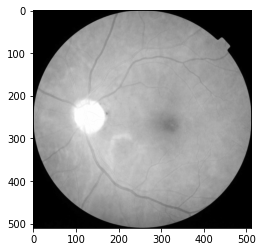

résultat prétraitement


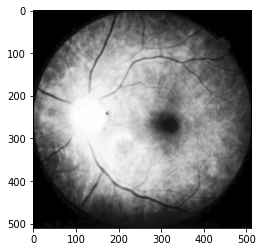

résultat Opennig


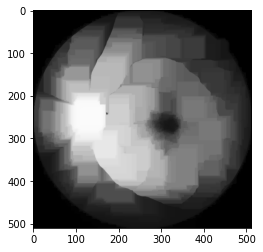

résultat closing


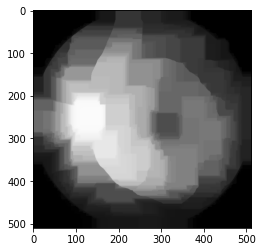

shape de closing= (510, 512)


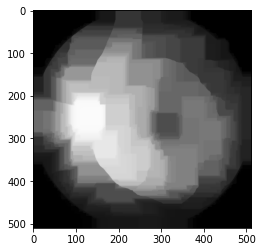

resultat de seuillage


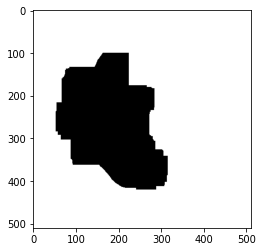

resultat final


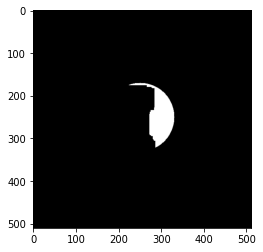

image originale converti en HSV


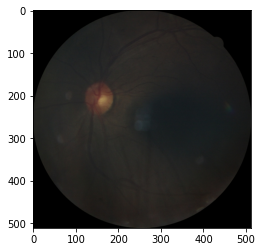

plan de couleur val


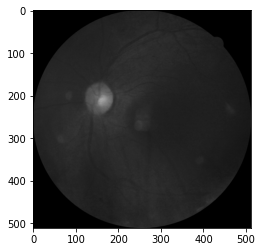

résultat prétraitement


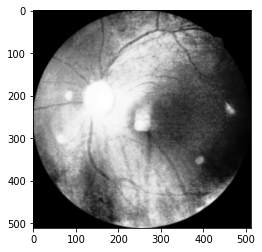

résultat Opennig


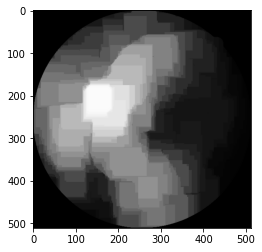

résultat closing


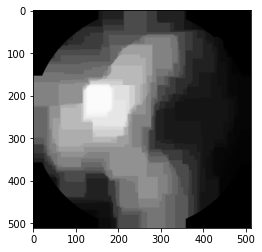

shape de closing= (511, 512)


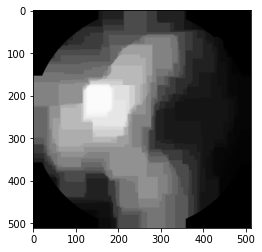

resultat de seuillage


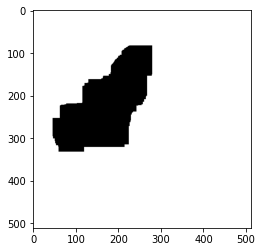

resultat final


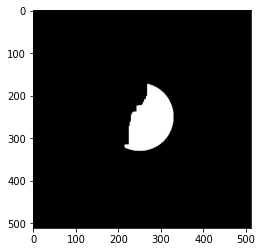

image originale converti en HSV


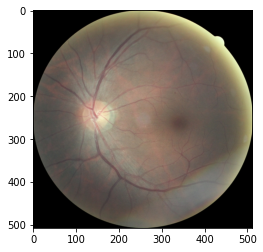

plan de couleur val


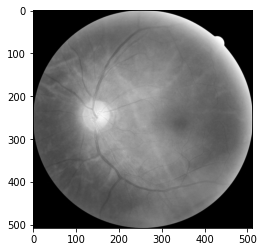

résultat prétraitement


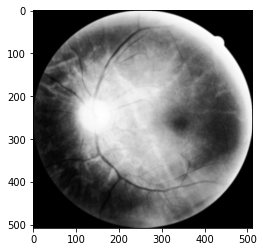

résultat Opennig


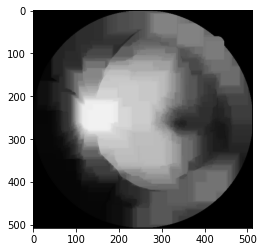

résultat closing


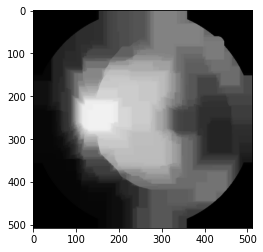

shape de closing= (508, 512)


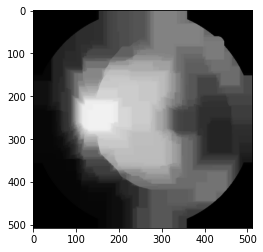

resultat de seuillage


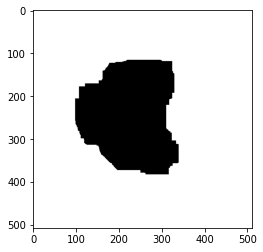

resultat final


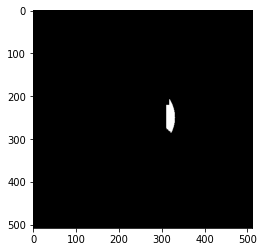

image originale converti en HSV


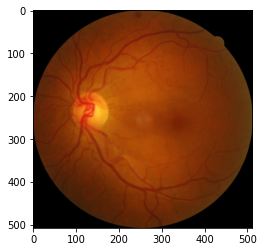

plan de couleur val


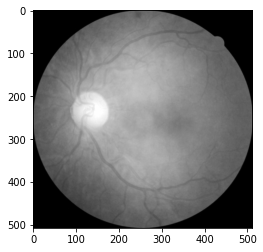

résultat prétraitement


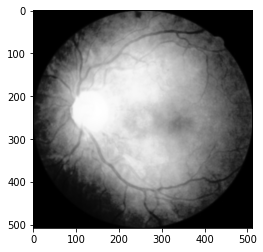

résultat Opennig


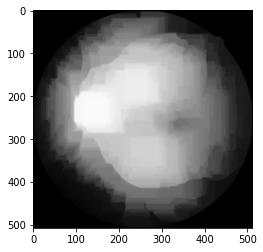

résultat closing


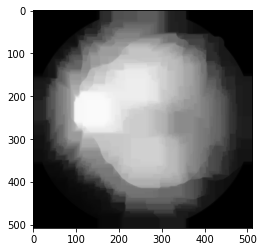

shape de closing= (508, 512)


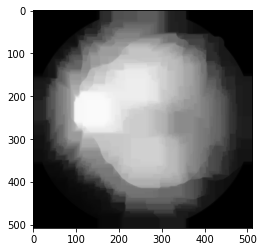

resultat de seuillage


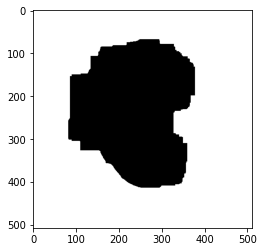

resultat final


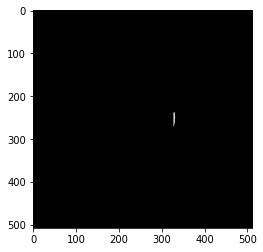

image originale converti en HSV


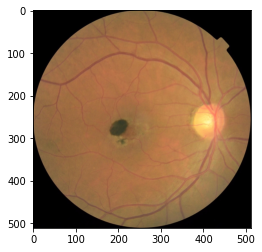

plan de couleur val


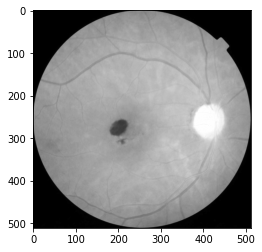

résultat prétraitement


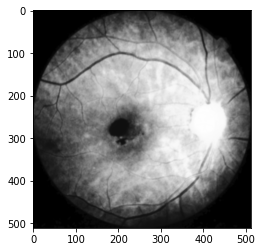

résultat Opennig


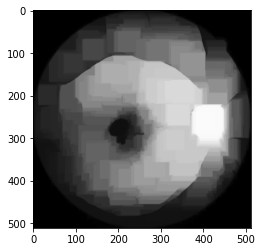

résultat closing


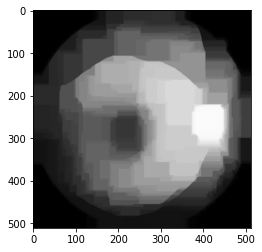

shape de closing= (511, 512)


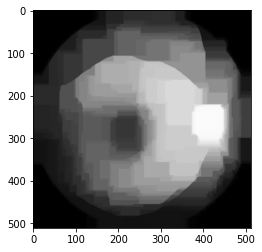

resultat de seuillage


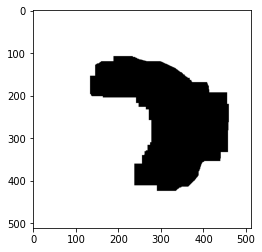

resultat final


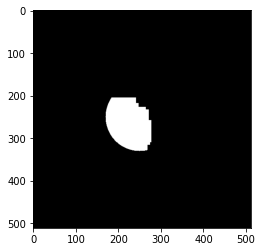

image originale converti en HSV


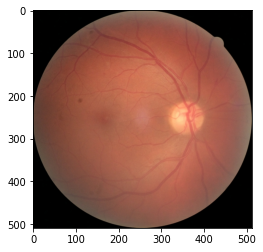

plan de couleur val


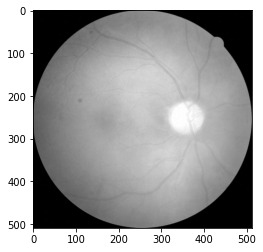

résultat prétraitement


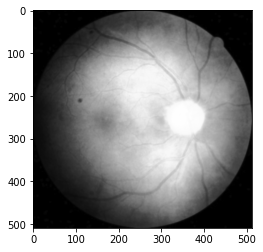

résultat Opennig


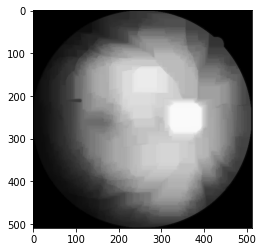

résultat closing


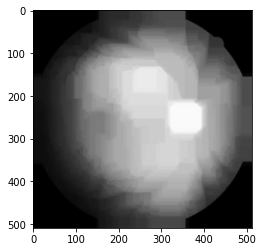

shape de closing= (509, 512)


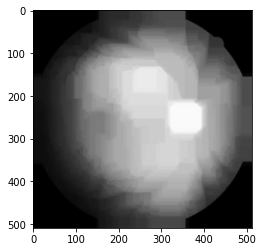

resultat de seuillage


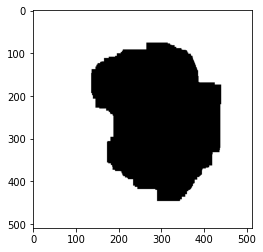

resultat final


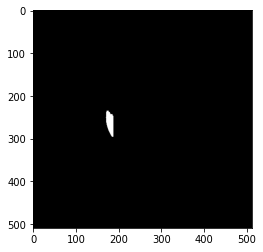

image originale converti en HSV


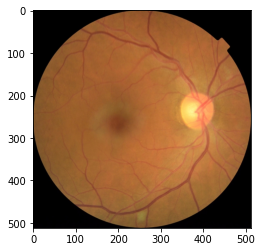

plan de couleur val


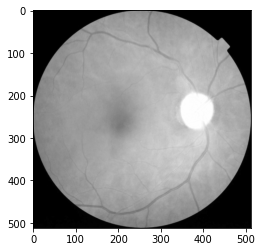

résultat prétraitement


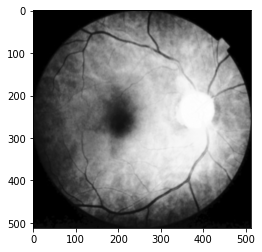

résultat Opennig


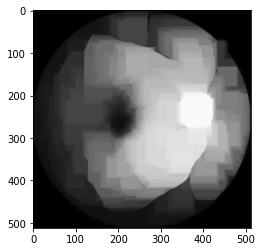

résultat closing


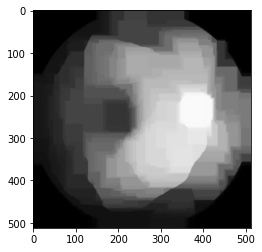

shape de closing= (512, 512)


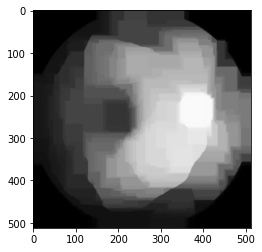

resultat de seuillage


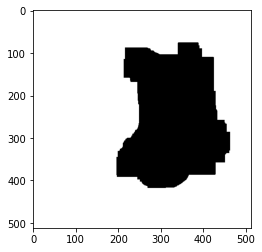

resultat final


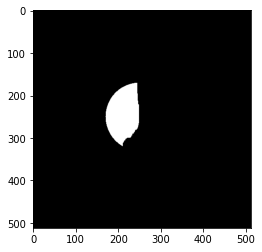

image originale converti en HSV


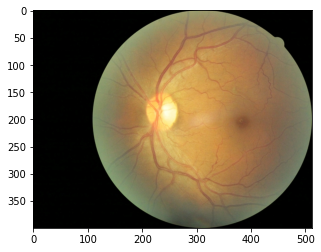

plan de couleur val


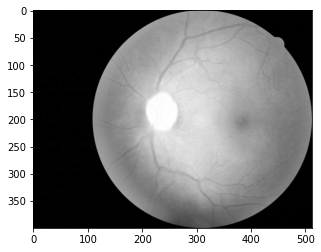

résultat prétraitement


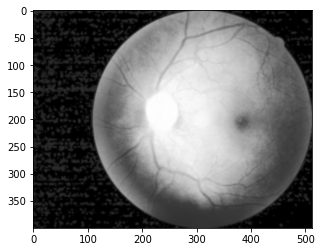

résultat Opennig


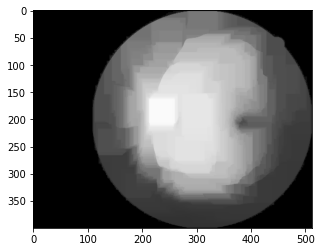

résultat closing


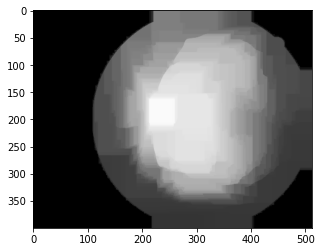

shape de closing= (400, 512)


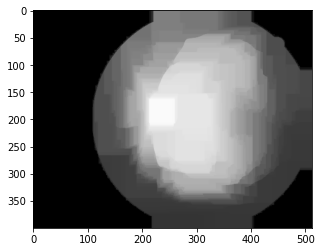

resultat de seuillage


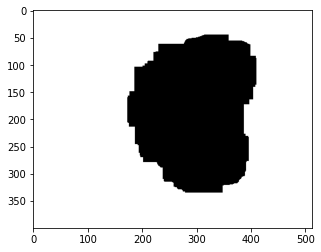

resultat final


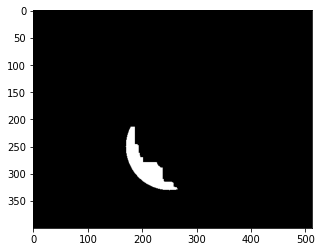

error: OpenCV(4.2.0) ../modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [12]:
images_path='/home/chakour/Bureau/Code Mehdi/macula/'

for images_name in os.listdir(images_path):
    img_pt = os.path.join(images_path,images_name)
    
    image = cv.imread(img_pt)  
    # convertir l'image en plan de couleur H S V
    hsv = cv.cvtColor(image,cv.COLOR_BGR2HSV)
    # diviser le plan de couleur HSV en 3 plans séparément 
    hue,sat,val = cv.split(hsv)

    image1=  cv.cvtColor(image, cv.COLOR_BGR2RGB)
    print("image originale converti en HSV")
    plt.imshow(image1)
    plt.show()
    # extraire le plan val
    val1=  cv.cvtColor(val, cv.COLOR_BGR2RGB)
    print("plan de couleur val")
    plt.imshow(val1)
    plt.show()
    
    # appliquer l'egalisation d'histogramme sur le plan val de l'image 
    equalized=cv.equalizeHist(val)
    #appliquer un filtre de gauss
    gblur = cv.GaussianBlur(equalized, (5,5), 0)
    gblur1=  cv.cvtColor(gblur, cv.COLOR_BGR2RGB)
    
    print("résultat prétraitement")
    plt.imshow(gblur1)
    plt.show()
    
    ################################## "filtrage morphologique" ######################################
    
    kernel = np.ones((7,7),np.uint8)
    # ouverture morphologique 
    opening = cv.morphologyEx(equalized,cv.MORPH_OPEN,kernel, iterations = 7)
    opening1=  cv.cvtColor(opening, cv.COLOR_BGR2RGB)
    print("résultat Opennig")
    plt.imshow(opening1)
    plt.show()
    # fermeture morphologique
    closing = cv.morphologyEx(opening,cv.MORPH_CLOSE,kernel, iterations = 7)
    closing1=  cv.cvtColor(closing, cv.COLOR_BGR2RGB)
    print("résultat closing")
    plt.imshow(closing1)
    plt.show()

    print("shape de closing=",closing.shape)
    plt.imshow(closing1 )
    plt.show()
    # seuillage de base Inversé 
    _, thresh1 = cv.threshold(closing, 150, 255, cv.THRESH_BINARY_INV)
    #print("shape de thresh1 =",thresh1.shape)
    thresh2 = cv.cvtColor(thresh1,cv.COLOR_BGR2RGB)
    print("resultat de seuillage")
    plt.imshow(thresh2)
    plt.show()
    
    mask = np.zeros(thresh2.shape,np.uint8)
    #print(mask.shape)
    # effectuer un masquage de ROI of macula
    mask1 = cv.circle(mask,(250,250),80, (255,255,255),-1) 
    #print(mask1.shape)
    # appliquer un le port AND
    result = cv.bitwise_and(mask, thresh2, mask=None)
    result1  = cv.cvtColor(result ,cv.COLOR_BGR2RGB)
    print("resultat final")
    plt.imshow(result1)
    plt.show()
    
    img_op ="/home/chakour/Bureau/Code Mehdi/macula/result_segmentation/" + images_name
   
    cv.imwrite(img_op,result1)


image originale converti en HSV


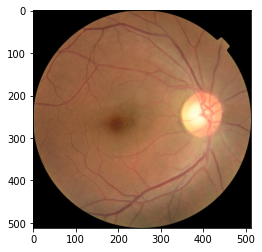

plan de couleur value


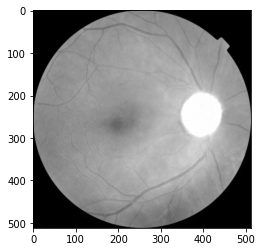

résultat prétraitement


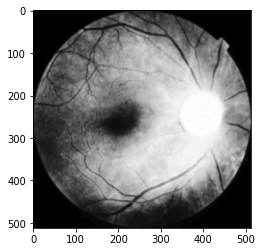

résultat ouverture morphologique


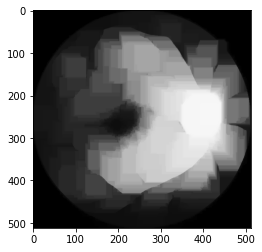

résultat ferméture morphologique


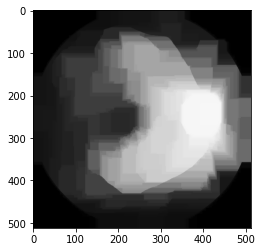

resultat de seuillage


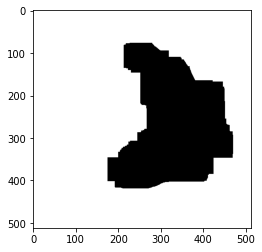

resultat final


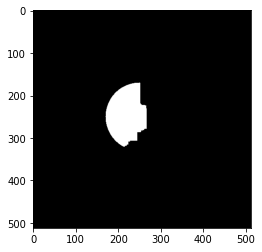

True

In [11]:
    ############################ "Application d'algorithme sur une seul image " ###############################
    
    img_pt ='/home/chakour/Bureau/Code Mehdi/reseau_vasculaire/12484_right.jpeg'
    # lire l'image couleur
    image = cv.imread(img_pt)  
    # convertir l'image en plan de couleur H S V
    hsv = cv.cvtColor(image,cv.COLOR_BGR2HSV)
    # déviser le plan de couleur HSV en 3 plans séparément 
    hue,sat,val = cv.split(hsv)

    image1=  cv.cvtColor(image, cv.COLOR_BGR2RGB)
    print("image originale converti en HSV")
    plt.imshow(image1)
    plt.show()
    # extraire le plan value
    val1=  cv.cvtColor(val, cv.COLOR_BGR2RGB)
    print("plan de couleur value")
    plt.imshow(val1)
    plt.show()
    
    # appliquer l'egalisation d'histogramme sur le plan val de l'image 
    equalized=cv.equalizeHist(val)
    #appliquer un filtre de gauss
    gblur = cv.GaussianBlur(equalized, (5,5), 0)
    gblur1=  cv.cvtColor(gblur, cv.COLOR_BGR2RGB)
    
    print("résultat prétraitement")
    plt.imshow(gblur1)
    plt.show()
    ################################## "filtrage morphologique" ######################################
    
    kernel = np.ones((7,7),np.uint8)
    # ouverture morphologique 
    opening = cv.morphologyEx(equalized,cv.MORPH_OPEN,kernel, iterations = 7)
    opening1=  cv.cvtColor(opening, cv.COLOR_BGR2RGB)
    print("résultat ouverture morphologique")
    plt.imshow(opening1)
    plt.show()
    # fermeture morphologique
    closing = cv.morphologyEx(opening,cv.MORPH_CLOSE,kernel, iterations = 7)
    closing1=  cv.cvtColor(closing, cv.COLOR_BGR2RGB)
    print("résultat ferméture morphologique")
    plt.imshow(closing1)
    plt.show()
    
    # seuillage de base Inversé 
    _, thresh1 = cv.threshold(closing, 150, 255, cv.THRESH_BINARY_INV)
    #print("shape de thresh1 =",thresh1.shape)
    thresh2 = cv.cvtColor(thresh1,cv.COLOR_BGR2RGB)
    print("resultat de seuillage")
    plt.imshow(thresh2)
    plt.show()
    
    mask = np.zeros(thresh2.shape,np.uint8)
    #print(mask.shape)
    # effectuer un masquage de ROI of macula
    mask1 = cv.circle(mask,(250,250),80, (255,255,255),-1) 
    #print(mask1.shape)
    # appliquer un le port AND
    result = cv.bitwise_and(mask, thresh2, mask=None)
    result1  = cv.cvtColor(result ,cv.COLOR_BGR2RGB)
    print("resultat final")
    plt.imshow(result1)
    plt.show()
    # save the result image
    filename = 'macula.jpeg'
    cv.imwrite(filename, result1) 
   